Simply just run the code with the appropiate price file.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0014 - val_loss: 5.7491e-04 - learning_rate: 0.0010
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 8.1621e-05 - val_loss: 6.0806e-04 - learning_rate: 0.0010
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 1.0848e-04 - val_loss: 6.2263e-04 - learning_rate: 0.0010
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 7.2095e-05 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 7.7265e-05 - val_loss: 5.6273e-04 - learning_rate: 0.0010
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 6.1114e-05 - val_loss: 5.4834e-04 - learning_rate: 0.0010
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 3.9351e-05 - val_loss: 4.9558e-04 - learning_rate: 5.0000e-04
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 4.7395e-05 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/st

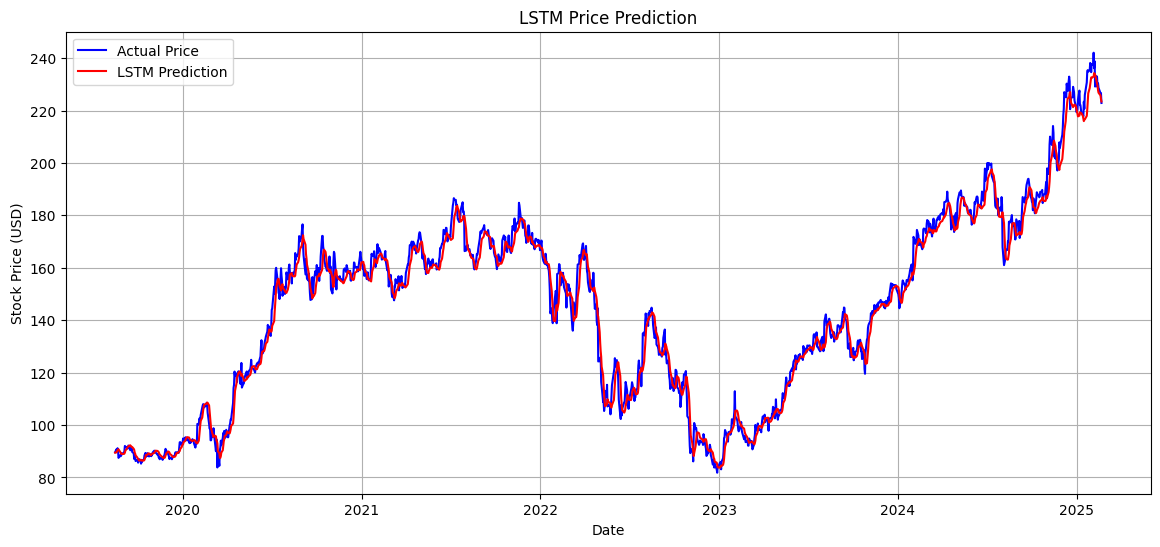

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

data = pd.read_csv('AMZN_1997-05-15_2025-02-21.csv')
data['date'] = pd.to_datetime(data['date'], utc=True)
features = ['adj_close', 'volume']
df = data[features].interpolate(method='linear')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create time series dataset
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)
train_size = int(len(X) * 0.8)
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

model = Sequential([
    LSTM(100, return_sequences=False, input_shape=(time_step, len(features))),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), callbacks=callbacks, verbose=1)

# Predict test data
test_pred = model.predict(X_test)
Y_test_inv = scaler.inverse_transform(np.concatenate([Y_test.reshape(-1, 1), np.zeros((len(Y_test), 1))], axis=1))[:, 0]
test_pred_inv = scaler.inverse_transform(np.concatenate([test_pred, np.zeros((len(test_pred), 1))], axis=1))[:, 0]

# Plot test prediction
plt.figure(figsize=(14, 6))
plt.plot(data['date'][train_size + time_step:], Y_test_inv, label='Actual Price', color='blue')
plt.plot(data['date'][train_size + time_step:], test_pred_inv, label='LSTM Prediction', color='red')
plt.title('LSTM Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



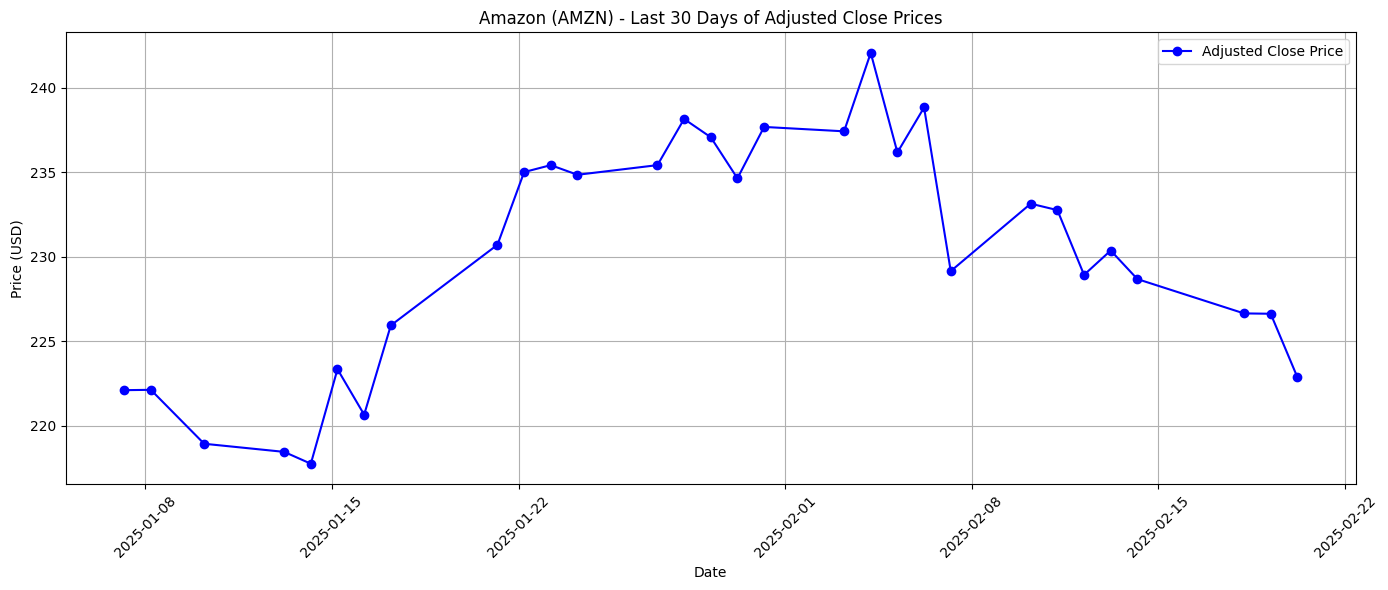

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "AMZN_1997-05-15_2025-02-21.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], utc=True)

last_30 = data.tail(30)

plt.figure(figsize=(14, 6))
plt.plot(last_30['date'], last_30['adj_close'], color='blue', marker='o', label='Adjusted Close Price')
plt.title('Amazon (AMZN) - Last 30 Days of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


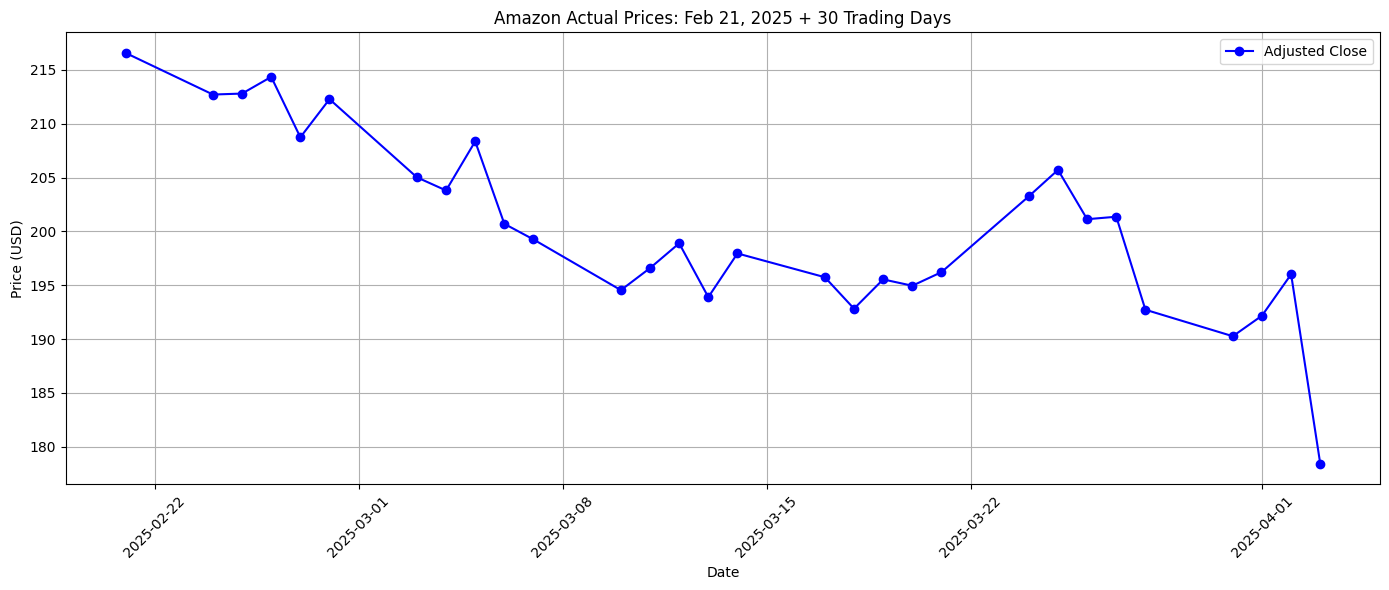

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AMZN"
start_date = "2025-02-21"
end_date = "2025-04-15"

amzn = yf.download(ticker, start=start_date, end=end_date)

amzn.reset_index(inplace=True)

next_30 = amzn.head(30)

plt.figure(figsize=(14, 6))
plt.plot(next_30['Date'], next_30['Close'], color='blue', marker='', label='Adjusted Close')
plt.title("Amazon Actual Prices: Feb 21, 2025 + 30 Trading Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


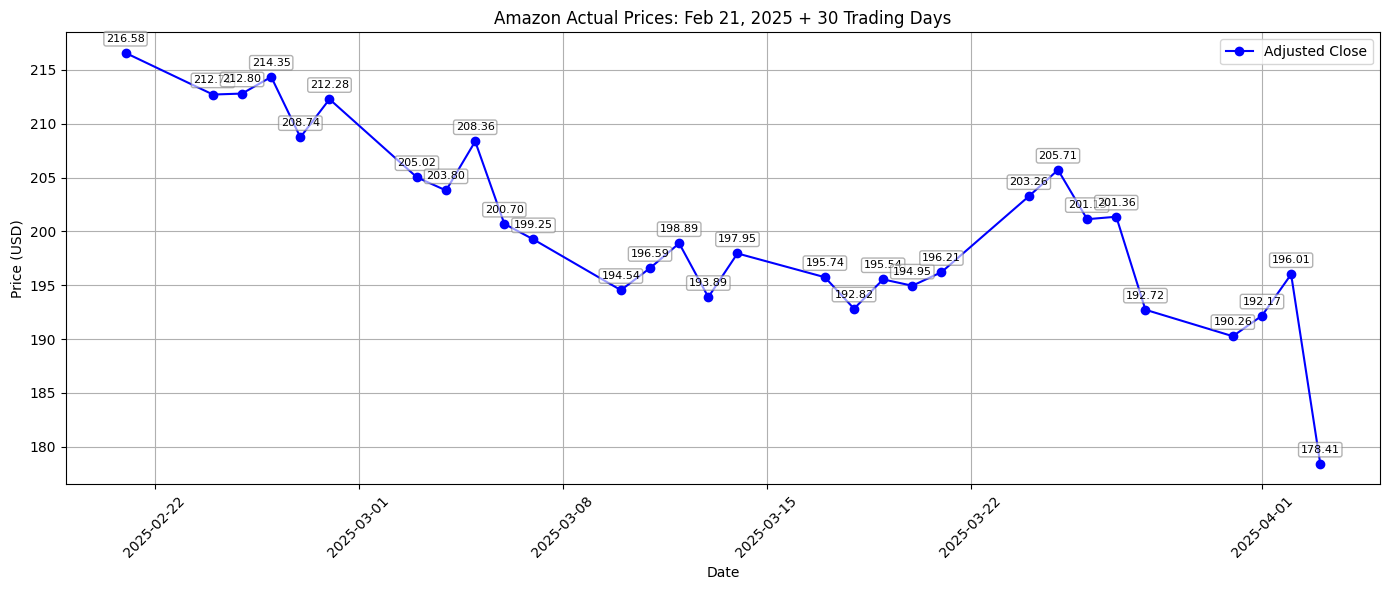

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AMZN"
start_date = "2025-02-21"
end_date = "2025-04-15"

amzn = yf.download(ticker, start=start_date, end=end_date)
amzn.reset_index(inplace=True)
next_30 = amzn.head(30)

plt.figure(figsize=(14, 6))
plt.plot(next_30['Date'], next_30['Close'], color='blue', marker='o', label='Adjusted Close')

for index, row in next_30.iterrows():
    date = row['Date']
    price = row['Close']
    plt.annotate(f"{price.item():.2f}",
                 (date, price),
                 textcoords="offset points",
                 xytext=(0, 8),
                 ha='center',
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.6))

plt.title("Amazon Actual Prices: Feb 21, 2025 + 30 Trading Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

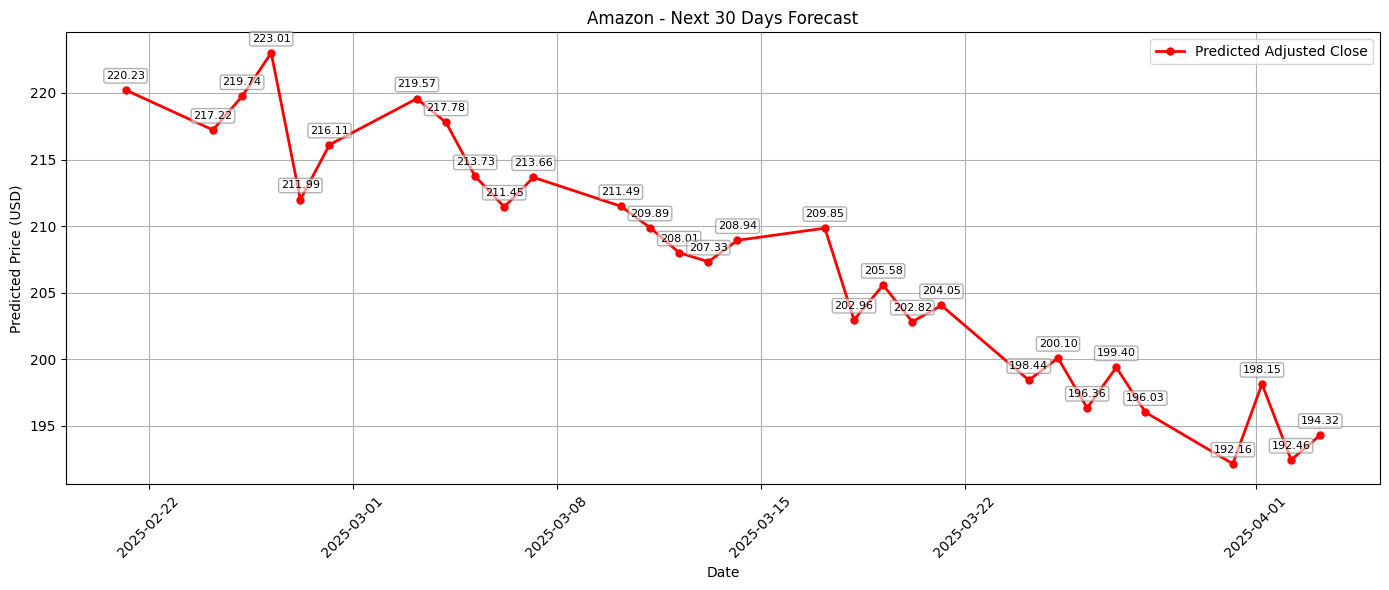

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize
predictions = []
last_sequence = scaled_data[-time_step:].copy()

for i in range(30):
    input_seq = last_sequence.reshape(1, time_step, len(features))
    pred_price = model.predict(input_seq, verbose=0)[0, 0]

    volatility_noise = np.random.normal(loc=0.0, scale=0.01)
    pred_price += pred_price * volatility_noise

    # Add downward bias in drift direction
    drift_direction = np.random.choice([-1, 1], p=[0.7, 0.3])
    drift_magnitude = np.random.uniform(0.005, 0.015)
    pred_price_with_drift = pred_price * (1 + drift_direction * drift_magnitude)

    predictions.append(pred_price_with_drift)

    last_volumes = last_sequence[-5:, 1]
    avg_volume = last_volumes.mean()
    volume_noise = np.random.normal(loc=0.0, scale=0.03)
    next_volume = max(avg_volume * (1 + volume_noise), 0)

    next_point = np.array([[pred_price_with_drift, next_volume]])
    last_sequence = np.vstack([last_sequence[1:], next_point])

pred_array = np.array(predictions).reshape(-1, 1)
zeros_array = np.zeros((30, 1))
combined = np.concatenate([pred_array, zeros_array], axis=1)
predicted_prices = scaler.inverse_transform(combined)[:, 0]

last_date = data['date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

plt.figure(figsize=(14, 6))
plt.plot(future_dates, predicted_prices, color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Predicted Adjusted Close')

for i, (date, price) in enumerate(zip(future_dates, predicted_prices)):
    plt.annotate(f"{price:.2f}",
                 (date, price),
                 textcoords="offset points",
                 xytext=(0, 8),
                 ha='center',
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.6))

plt.title('Amazon - Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()